**Starting of the project in a single Ipynb file with proper titles and comments for the explanation of reading the code**

The flow of the project in this ipynb file is as follows

*   Importing necessary python libraries and dataset
*   Data pre-processing  

1.   Addressing the missing data
2.   Encoding the categorical data
3.   Iterative feature selection
4.   ML model training
5.   Analysis of different ML models using accuracy and F1 scores
6.   Prediction of the choosen model on the test data.



**Step 1 - Importing the libraries and datasets.**

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing the training data
df = pd.read_csv('/content/TrainingDataBank.csv')

<ipython-input-3-d69168735915>:1: DtypeWarning: Columns (5,18,23,24,25,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/TrainingDataBank.csv')


In [4]:
# 'Primary key' is the column name we want to drop , it's customer ID , no use in training
df_Primary_key = df['Primary key']  # Store the 'Primary key' column in df_Primary_key
df = df.drop('Primary key', axis=1)  # Drop the 'Primary key' column from the DataFrame df

# Now df does not contain the 'Primary key' column, and df_Primary_key contains that column

In [5]:
# Importing the Test Data
df_val = pd.read_csv('/content/Bank_Validation_Data.csv')

<ipython-input-5-cbe4bd292ec6>:1: DtypeWarning: Columns (4,17,22,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_val = pd.read_csv('/content/Bank_Validation_Data.csv')


In [6]:
df_val_copy = df_val.copy()
df_copy = df.copy()

In [7]:
df_val_Primary_key = df_val['Primary key']  # Store the 'Primary key' column in df_val_Primary_key
df_val = df_val.drop('Primary key', axis=1)  # Drop the 'Primary key' column from the DataFrame df_val

# Now df_val does not contain the 'Primary key' column, and df_val_Primary_key contains that column

In [8]:
df.head(5)

,Target,account_opening_date,country_code,demog_1,demog_2,income,demog_3,city_tier,occupation,demog_4,...,demog_39,email_domain,demog_40,demog_41,others_42,others_43,others_44,others_45,demog_42,demog_43
0,0,2/18/2023,IN,53.0,3.0,100001 to 5L,101.0,Rural,Self_Employed,N,...,1,gmail,low,1,NaN,0.0,NaN,NaN,1,medium
1,0,2/1/2023,IN,55.0,1.0,0 to 1L,101.0,Tier 1,Salaried,N,...,1,gmail,High,1,NaN,NaN,NaN,NaN,1,High
2,0,12/9/2022,IN,55.0,3.0,0 to 1L,101.0,Tier 2,Self_Employed,N,...,1,gmail,medium,1,NaN,NaN,NaN,NaN,1,High
3,0,3/31/2023,IN,53.0,3.0,100001 to 5L,101.0,Tier 7,Self_Employed,N,...,1,gmail,High,1,NaN,NaN,NaN,NaN,1,High
4,0,1/17/2023,IN,55.0,6.0,0 to 1L,101.0,Tier 1,Student,N,...,1,gmail,low,1,NaN,NaN,NaN,NaN,1,medium


In [9]:
df_val.head(5)

,account_opening_date,country_code,demog_1,demog_2,income,demog_3,city_tier,occupation,demog_4,demog_5,...,demog_39,email_domain,demog_40,demog_41,others_42,others_43,others_44,others_45,demog_42,demog_43
0,3/25/2023,IN,56.0,2.0,5L to 10L,101.0,Tier 7,Self_Employed,N,4.0,...,1,gmail,High,1,NaN,NaN,NaN,NaN,1,High
1,1/15/2023,IN,55.0,1.0,100001 to 5L,101.0,Tier 5,Salaried,N,2.0,...,1,gmail,low,1,NaN,NaN,NaN,NaN,1,medium
2,1/6/2023,IN,55.0,1.0,100001 to 5L,101.0,Tier 1,Other,N,3.0,...,1,gmail,low,1,NaN,NaN,NaN,NaN,1,medium
3,2/8/2023,IN,55.0,1.0,100001 to 5L,101.0,Tier 1,Other,N,4.0,...,1,gmail,medium,1,NaN,0.0,NaN,NaN,1,High
4,1/27/2023,IN,55.0,1.0,100001 to 5L,101.0,Tier 5,Other,N,4.0,...,1,gmail,low,1,NaN,NaN,NaN,NaN,1,High


**Step 2 - Data pre-processing**

Adressing the missing value by complete case analysis for some columns , removing useless columns that aren't necessary for training as well as testing data.

In [10]:
unique_value_counts_df_main = df.nunique()
columns_with_nunique_1 = unique_value_counts_df_main[unique_value_counts_df_main == 1].index.tolist()
# List of columns to be removed
columns_to_remove = ['demog_7', 'demog_10', 'demog_12', 'txn_35', 'txn_36', 'txn_49', 'txn_50', 'txn_65', 'txn_70', 'txn_71', 'txn_72', 'demog_38','others_42','others_43','others_44','others_45','country_code','os','demog_22','txn_37', 'txn_55', 'txn_61', 'txn_62', 'txn_66', 'others_3', 'others_17', 'others_19', 'others_20', 'others_29', 'others_30', 'others_31', 'others_32', 'others_40', 'others_41']

# Remove columns from the original DataFrame
df = df.drop(columns=columns_to_remove)

# code of conversion from date to numeric data
df['account_opening_date'] = pd.to_datetime(df['account_opening_date'], format='%m/%d/%Y')

# Extract day, month, and year into new columns
df['opening_day'] = df['account_opening_date'].dt.day
df['opening_month'] = df['account_opening_date'].dt.month
df['opening_year'] = df['account_opening_date'].dt.year

# Drop the original 'account_opening_date' column
df = df.drop('account_opening_date', axis=1)

# Deleting rows
df = df.dropna(subset=['occupation'])
# Resetting the index after dropping rows
df.reset_index(drop=True, inplace=True)
df = df.dropna(subset=['city_tier'])
# Resetting the index after dropping rows
df.reset_index(drop=True, inplace=True)
# Filter rows where 'demog_2' column has 'ZZ' value and indices are in the specified list
rows_to_delete = df[df['demog_2'] == 'ZZ']

# Delete the filtered rows from the DataFrame
df.drop(rows_to_delete.index, inplace=True)

# Replace missing values in 'income' column with '100001 to 5L' where 'Target' is equal to 1
# df.loc[df['Target'] == 1, 'income'].fillna('100001 to 5L', inplace=True)

# Set missing values in 'demog_40' column to 'High' where 'Target' is equal to 1
df.loc[df['Target'] == 1, 'demog_40'].fillna('High', inplace=True)

#Filling the missing value of demog_4 column
df['demog_4'].fillna('N', inplace=True)

# Create a binary column indicating the presence of 'N'
df['is_N'] = df['demog_4'].apply(lambda x: 1 if x == 'N' else 0)

# Create a new numeric column for the numeric values
df['numeric_values_demog_4'] = pd.to_numeric(df['demog_4'], errors='coerce')

# Fill 0 where 'N' was present
df['numeric_values_demog_4'].fillna(0, inplace=True)
df = df.drop(columns=['demog_4'])

df['income'].fillna('100001 to 5L', inplace=True)

In [11]:
# Filter rows where 'demog_2' column has 'ZZ' value and indices are in the specified list
df_val.loc[df_val['demog_2'] == 'ZZ', 'demog_2'] = 1.0

# Find the mode of the 'city_tier' column
mode_city_tier = df_val['city_tier'].mode()[0]

# Fill missing values with the mode
df_val['city_tier'] = df_val['city_tier'].fillna(mode_city_tier)

# Find the mode of the 'occupation' column
mode_occupation = df_val['occupation'].mode()[0]

# Fill missing values with the mode
df_val['occupation'] = df_val['occupation'].fillna(mode_occupation)

Adressing the missing value of the test data , removing useless columns that aren't necessary for training as well as testing data.

In [12]:
unique_value_counts_df_val_main = df_val.nunique()
columns_with_nunique_1 = unique_value_counts_df_val_main[unique_value_counts_df_val_main == 1].index.tolist()
# List of columns to be removed
columns_to_remove = ['demog_7', 'demog_10', 'demog_12', 'txn_35', 'txn_36', 'txn_49', 'txn_50', 'txn_65', 'txn_70', 'txn_71', 'txn_72', 'demog_38','others_42','others_43','others_44','others_45','country_code','os','demog_22','txn_37', 'txn_55', 'txn_61', 'txn_62', 'txn_66', 'others_3', 'others_17', 'others_19', 'others_20', 'others_29', 'others_30', 'others_31', 'others_32', 'others_40', 'others_41']

# Remove columns from the original DataFrame
df_val = df_val.drop(columns=columns_to_remove)

# code of conversion from date to numeric data
df_val['account_opening_date'] = pd.to_datetime(df_val['account_opening_date'], format='%m/%d/%Y')

# Extract day, month, and year into new columns
df_val['opening_day'] = df_val['account_opening_date'].dt.day
df_val['opening_month'] = df_val['account_opening_date'].dt.month
df_val['opening_year'] = df_val['account_opening_date'].dt.year

# Drop the original 'account_opening_date' column
df_val = df_val.drop('account_opening_date', axis=1)

# Replace missing values in 'income' column with '100001 to 5L' where 'Target' is equal to 1
# df_val.loc[df_val['Target'] == 1, 'income'].fillna('100001 to 5L', inplace=True)

# Set missing values in 'demog_40' column to 'High' where 'Target' is equal to 1
df_val['demog_40'].fillna('High', inplace=True)

#Filling the missing value of demog_4 column
df_val['demog_4'].fillna('N', inplace=True)

# Create a binary column indicating the presence of 'N'
df_val['is_N'] = df_val['demog_4'].apply(lambda x: 1 if x == 'N' else 0)

# Create a new numeric column for the numeric values
df_val['numeric_values_demog_4'] = pd.to_numeric(df_val['demog_4'], errors='coerce')

# Fill 0 where 'N' was present
df_val['numeric_values_demog_4'].fillna(0, inplace=True)
df_val = df_val.drop(columns=['demog_4'])

df_val['income'].fillna('100001 to 5L', inplace=True)

Encoding the data which contains bool type column , with TRUE as 1 and with FALSE as 0 , so the encoding of such columns which contains bool type column is done here

In [13]:
# Assuming df is your DataFrame


# Fill missing values in 'demog_13' column with True
df.loc[:, 'demog_13'].fillna(True, inplace=True)
df['demog_13'] = df['demog_13'].astype(bool)

# Fill missing values in 'demog_14' column with False
df.loc[:, 'demog_14'].fillna(False, inplace=True)
df['demog_14'] = df['demog_14'].astype(bool)

# Fill missing values in 'demog_15' column with True
df.loc[:, 'demog_15'].fillna(True, inplace=True)
df['demog_15'] = df['demog_15'].astype(bool)

# Fill missing values in 'demog_16' column with True
df.loc[:, 'demog_16'].fillna(True, inplace=True)
df['demog_16'] = df['demog_16'].astype(bool)

# Fill missing values in 'demog_9' column with False
df.loc[:, 'demog_9'].fillna(False, inplace=True)
df['demog_9'] = df['demog_9'].astype(bool)

# Fill missing values in 'demog_17' column with True
df.loc[:, 'demog_17'].fillna(True, inplace=True)
df['demog_17'] = df['demog_17'].astype(bool)

# Fill missing values in 'demog_18' column with False
df.loc[:, 'demog_18'].fillna(False, inplace=True)
df['demog_18'] = df['demog_18'].astype(bool)

# Fill missing values in 'demog_19' column with True
df.loc[:, 'demog_19'].fillna(True, inplace=True)
df['demog_19'] = df['demog_19'].astype(bool)

# Fill missing values in 'demog_20' column with False
df.loc[:, 'demog_20'].fillna(False, inplace=True)
df['demog_20'] = df['demog_20'].astype(bool)

# Fill missing values in 'demog_21' column with False
df.loc[:, 'demog_21'].fillna(False, inplace=True)
df['demog_21'] = df['demog_21'].astype(bool)

df['demog_2'].fillna(1.0, inplace=True)

boolean_columns = ['demog_17', 'demog_18', 'demog_19', 'demog_20', 'demog_21','demog_9','demog_13','demog_14','demog_15','demog_16']

# Convert boolean columns to numerical values (0 for False, 1 for True)
df[boolean_columns] = df[boolean_columns].astype(int)

df['demog_30'].fillna(0, inplace=True)
df['demog_31'].fillna(0, inplace=True)
df['demog_32'].fillna(0, inplace=True)
df['demog_33'].fillna(1, inplace=True)
df['demog_34'].fillna(1, inplace=True)
df['demog_35'].fillna(0, inplace=True)
df['demog_36'].fillna(0, inplace=True)
df['demog_37'].fillna(0, inplace=True)
df['demog_3'].fillna(101, inplace=True)

In [14]:
# Assuming df_val is your DataFrame , doing same for validation data


# Fill missing values in 'demog_13' column with True
df_val.loc[:, 'demog_13'].fillna(True, inplace=True)
df_val['demog_13'] = df_val['demog_13'].astype(bool)

# Fill missing values in 'demog_14' column with False
df_val.loc[:, 'demog_14'].fillna(False, inplace=True)
df_val['demog_14'] = df_val['demog_14'].astype(bool)

# Fill missing values in 'demog_15' column with True
df_val.loc[:, 'demog_15'].fillna(True, inplace=True)
df_val['demog_15'] = df_val['demog_15'].astype(bool)

# Fill missing values in 'demog_16' column with True
df_val.loc[:, 'demog_16'].fillna(True, inplace=True)
df_val['demog_16'] = df_val['demog_16'].astype(bool)

# Fill missing values in 'demog_9' column with False
df_val.loc[:, 'demog_9'].fillna(False, inplace=True)
df_val['demog_9'] = df_val['demog_9'].astype(bool)

# Fill missing values in 'demog_17' column with True
df_val.loc[:, 'demog_17'].fillna(True, inplace=True)
df_val['demog_17'] = df_val['demog_17'].astype(bool)

# Fill missing values in 'demog_18' column with False
df_val.loc[:, 'demog_18'].fillna(False, inplace=True)
df_val['demog_18'] = df_val['demog_18'].astype(bool)

# Fill missing values in 'demog_19' column with True
df_val.loc[:, 'demog_19'].fillna(True, inplace=True)
df_val['demog_19'] = df_val['demog_19'].astype(bool)

# Fill missing values in 'demog_20' column with False
df_val.loc[:, 'demog_20'].fillna(False, inplace=True)
df_val['demog_20'] = df_val['demog_20'].astype(bool)

# Fill missing values in 'demog_21' column with False
df_val.loc[:, 'demog_21'].fillna(False, inplace=True)
df_val['demog_21'] = df_val['demog_21'].astype(bool)

df_val['demog_2'].fillna(1.0, inplace=True)

boolean_columns = ['demog_17', 'demog_18', 'demog_19', 'demog_20', 'demog_21','demog_9','demog_13','demog_14','demog_15','demog_16']

# Convert boolean columns to numerical values (0 for False, 1 for True)
df_val[boolean_columns] = df_val[boolean_columns].astype(int)

df_val['demog_30'].fillna(0, inplace=True)
df_val['demog_31'].fillna(0, inplace=True)
df_val['demog_32'].fillna(0, inplace=True)
df_val['demog_33'].fillna(1, inplace=True)
df_val['demog_34'].fillna(1, inplace=True)
df_val['demog_35'].fillna(0, inplace=True)
df_val['demog_36'].fillna(0, inplace=True)
df_val['demog_37'].fillna(0, inplace=True)
df_val['demog_3'].fillna(101, inplace=True)

In [15]:
# Creating necessary columns that are necessary for analysing different columns of the train and test data
def find_rows_with_missing_values(df, column_name):
    rows_with_missing_values = df[df[column_name].isna()]
    return rows_with_missing_values.index

In [16]:
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame
# Create an instance of SimpleImputer with strategy='most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

df['demog_40'] = imputer.fit_transform(df[['demog_40']])
df['demog_43'] = imputer.fit_transform(df[['demog_43']])
df['demog_8'] = imputer.fit_transform(df[['demog_8']])
# If you have multiple columns with missing values, you can use the following
# df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [17]:
from sklearn.impute import SimpleImputer

# Assuming df_val is your DataFrame
# Create an instance of SimpleImputer with strategy='most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

df_val['demog_40'] = imputer.fit_transform(df_val[['demog_40']])
df_val['demog_43'] = imputer.fit_transform(df_val[['demog_43']])
df_val['demog_8'] = imputer.fit_transform(df_val[['demog_8']])
# If you have multiple columns with missing values, you can use the following
# df_val = pd.DataFrame(imputer.fit_transform(df_val), columns=df_val.columns)

In [18]:
column_names = df.columns.tolist()

In [19]:
column_names_val = df_val.columns.tolist()

In [20]:
# Creating necessary columns that are necessary for analysing different columns of the train and test data
def analyze_column(df, column_name):
    # Value counts where 'Target' is 0
    value_counts_target_0 = df[df['Target'] == 0][column_name].value_counts()

    # Value counts where 'Target' is 1
    value_counts_target_1 = df[df['Target'] == 1][column_name].value_counts()

    # Null values where 'Target' is 0
    null_values_target_0 = df[df['Target'] == 0][column_name].isnull().sum()

    # Null values where 'Target' is 1
    null_values_target_1 = df[df['Target'] == 1][column_name].isnull().sum()

    return value_counts_target_0, value_counts_target_1, null_values_target_0, null_values_target_1

In [21]:
from sklearn.impute import KNNImputer

# Assuming df is your DataFrame
# Extract the relevant columns for imputation
impute_columns = ['demog_24','demog_26','demog_1']
# Create a copy of the DataFrame to avoid modifying the original data
df_impute = df.copy()

# Initialize the KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Perform imputation on the selected columns
df_impute[impute_columns] = knn_imputer.fit_transform(df_impute[impute_columns])

# Update the original DataFrame with the imputed values
df[impute_columns] = df_impute[impute_columns]

In [22]:
from sklearn.impute import KNNImputer

# Assuming df_val is your DataFrame
# Extract the relevant columns for imputation
impute_columns = ['demog_24','demog_26','demog_1']
# Create a copy of the DataFrame to avoid modifying the original data
df_val_impute = df_val.copy()

# Initialize the KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Perform imputation on the selected columns
df_val_impute[impute_columns] = knn_imputer.fit_transform(df_val_impute[impute_columns])

# Update the original DataFrame with the imputed values
df_val[impute_columns] = df_val_impute[impute_columns]

In [23]:
# Extract the relevant columns for imputation
impute_columns1 = ['demog_5']

# Create a copy of the DataFrame to avoid modifying the original data
df_impute1 = df.copy()

# Initialize the KNNImputer
knn_imputer1 = KNNImputer(n_neighbors=1)

# Perform imputation on the selected columns
df_impute1[impute_columns1] = knn_imputer1.fit_transform(df_impute1[impute_columns1])

# Update the original DataFrame with the imputed values
df[impute_columns1] = df_impute1[impute_columns1]

In [24]:
# Extract the relevant columns for imputation
impute_columns1 = ['demog_5']

# Create a copy of the DataFrame to avoid modifying the original data
df_val_impute1 = df_val.copy()

# Initialize the KNNImputer
knn_imputer1 = KNNImputer(n_neighbors=1)

# Perform imputation on the selected columns
df_val_impute1[impute_columns1] = knn_imputer1.fit_transform(df_val_impute1[impute_columns1])

# Update the original DataFrame with the imputed values
df_val[impute_columns1] = df_val_impute1[impute_columns1]

To facilitate a more focused and convenient analysis, the dataset was partitioned into four subsets: df_demog(for demographic attributes), df_tx(for transaction attributes), df_others(for other attributes), and df_object(for non numeric data attributes). This division allowed for separate and targeted analysis on each subset, enhancing the comprehensibility and effectiveness of the overall data examination."              

In [25]:
demog_prefix = 'demog_'
txn_prefix = 'txn_'
others_prefix = 'others_'

# Identify columns with demographic attributes
demog_columns = [col for col in df.columns if col.startswith(demog_prefix)]
df_demog = df[demog_columns]

# Identify columns with transaction attributes
txn_columns = [col for col in df.columns if col.startswith(txn_prefix)]
df_tx = df[txn_columns]

# Identify columns with other attributes
others_columns = [col for col in df.columns if col.startswith(others_prefix)]
df_others = df[others_columns]

df_object = df.select_dtypes(include=['object'])

# Making column list of all different dataframes
df_tx_column_names_list = df_tx.columns.tolist()
df_demog_column_names_list = df_demog.columns.tolist()
df_others_column_names_list = df_others.columns.tolist()
column_names_of_df_object = df_object.columns.tolist()

In [26]:
demog_prefix = 'demog_'
txn_prefix = 'txn_'
others_prefix = 'others_'

# Identify columns with demographic attributes
demog_columns = [col for col in df_val.columns if col.startswith(demog_prefix)]
df_val_demog = df_val[demog_columns]

# Identify columns with transaction attributes
txn_columns = [col for col in df_val.columns if col.startswith(txn_prefix)]
df_val_tx = df_val[txn_columns]

# Identify columns with other attributes
others_columns = [col for col in df_val.columns if col.startswith(others_prefix)]
df_val_others = df_val[others_columns]

df_val_object = df_val.select_dtypes(include=['object'])

# Making column list of all different dataframes
df_val_tx_column_names_list = df_val_tx.columns.tolist()
df_val_demog_column_names_list = df_val_demog.columns.tolist()
df_val_others_column_names_list = df_val_others.columns.tolist()
column_names_of_df_val_object = df_val_object.columns.tolist()

In [27]:
# List of columns to exclude with object data type
exclude_columns = ['account_opening_date', 'country_code', 'demog_2', 'income', 'city_tier', 'occupation',
                   'demog_4', 'demog_17', 'demog_18', 'demog_19', 'demog_20', 'demog_21', 'demog_22',
                   'os', 'email_domain', 'demog_40', 'demog_43']

# Select only numerical columns by excluding the specified columns
numerical_df = df.select_dtypes(include=['number']).drop(columns=exclude_columns, errors='ignore')

In [28]:
target_counts = df['Target'].value_counts()
target_counts

0    93747
1     1999
Name: Target, dtype: int64

Analysis of the data in different segments to get familiar understanding of each column of the demographic type, transaction , other attributes

In [29]:
unique_value_counts = df_tx.nunique()

In [30]:
unique_value_counts

txn_1      63
txn_2      88
txn_3      50
txn_4      74
txn_5     303
         ... 
txn_77     90
txn_78     30
txn_79     90
txn_80    799
txn_81    344
Length: 68, dtype: int64

In [31]:
distinct_values_counts_details = df_tx.apply(lambda x: pd.Series({'Distinct Values': x.value_counts().index.tolist(), 'Count': x.value_counts().tolist()})).T

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95746 entries, 0 to 95748
Columns: 146 entries, Target to numeric_values_demog_4
dtypes: float64(108), int64(31), object(7)
memory usage: 107.4+ MB


In [33]:
data_types = df.dtypes

In [34]:
data_types.value_counts()

float64    108
int64       31
object       7
dtype: int64

In [35]:
df_object = df.select_dtypes(include=['object'])

# Print or use the new DataFrame
print("New DataFrame with 'object' Data Type Columns:")
df_object

New DataFrame with 'object' Data Type Columns:


,demog_2,income,city_tier,occupation,email_domain,demog_40,demog_43
0,3.0,100001 to 5L,Rural,Self_Employed,gmail,low,medium
1,1.0,0 to 1L,Tier 1,Salaried,gmail,High,High
2,3.0,0 to 1L,Tier 2,Self_Employed,gmail,medium,High
3,3.0,100001 to 5L,Tier 7,Self_Employed,gmail,High,High
4,6.0,0 to 1L,Tier 1,Student,gmail,low,medium
...,...,...,...,...,...,...,...
95744,2,0 to 1L,Rural,Self_Employed,gmail,High,High
95745,6,100001 to 5L,Rural,Student,gmail,low,medium
95746,1,100001 to 5L,Tier 6,Salaried,gmail,High,medium
95747,1,5L to 10L,Tier 1,Other,gmail,High,High


In [36]:
column_names_of_df_object = df_object.columns.tolist()

In [37]:
column_names_of_df_object

['demog_2',
 'income',
 'city_tier',
 'occupation',
 'email_domain',
 'demog_40',
 'demog_43']

In [38]:
df.iloc[:, 5].value_counts() #mixed data type

Tier 1    25677
Rural     19423
Tier 8    12078
Tier 7    10388
Tier 6     8977
Tier 3     6326
Tier 5     5629
Tier 2     4944
Tier 4     2304
Name: city_tier, dtype: int64

In [39]:
df.isnull().mean()*100

Target                    0.0
demog_1                   0.0
demog_2                   0.0
income                    0.0
demog_3                   0.0
                         ... 
opening_day               0.0
opening_month             0.0
opening_year              0.0
is_N                      0.0
numeric_values_demog_4    0.0
Length: 146, dtype: float64

In [40]:
unique_value_counts_df_main = pd.DataFrame(df.nunique())

In [41]:
df_demog.isnull().mean()*100

demog_1     0.0
demog_2     0.0
demog_3     0.0
demog_5     0.0
demog_6     0.0
demog_8     0.0
demog_9     0.0
demog_11    0.0
demog_13    0.0
demog_14    0.0
demog_15    0.0
demog_16    0.0
demog_17    0.0
demog_18    0.0
demog_19    0.0
demog_20    0.0
demog_21    0.0
demog_23    0.0
demog_24    0.0
demog_25    0.0
demog_26    0.0
demog_27    0.0
demog_28    0.0
demog_29    0.0
demog_30    0.0
demog_31    0.0
demog_32    0.0
demog_33    0.0
demog_34    0.0
demog_35    0.0
demog_36    0.0
demog_37    0.0
demog_39    0.0
demog_40    0.0
demog_41    0.0
demog_42    0.0
demog_43    0.0
dtype: float64

In [42]:
df_others.isnull().mean()*100

others_1      0.000000
others_2      0.000000
others_4      0.001044
others_5     13.644434
others_6      0.003133
others_7      0.003133
others_8      0.003133
others_9      0.003133
others_10     0.003133
others_11     0.003133
others_12     0.000000
others_13     0.000000
others_14     0.000000
others_15    39.072128
others_16    39.072128
others_18     0.000000
others_21    14.133227
others_22    14.133227
others_23    14.133227
others_24    14.133227
others_25    14.133227
others_26    14.133227
others_27     0.009400
others_28     0.009400
others_33     0.000000
others_34     0.000000
others_35     0.000000
others_36     0.000000
others_37     0.000000
others_38     0.000000
others_39     0.000000
dtype: float64

In [43]:
df_object.isnull().mean()*100

demog_2         0.0
income          0.0
city_tier       0.0
occupation      0.0
email_domain    0.0
demog_40        0.0
demog_43        0.0
dtype: float64

In [44]:
analyze_column(df,'city_tier')

(Tier 1    25323
 Rural     18885
 Tier 8    11804
 Tier 7    10179
 Tier 6     8766
 Tier 3     6200
 Tier 5     5533
 Tier 2     4817
 Tier 4     2240
 Name: city_tier, dtype: int64,
 Rural     538
 Tier 1    354
 Tier 8    274
 Tier 6    211
 Tier 7    209
 Tier 2    127
 Tier 3    126
 Tier 5     96
 Tier 4     64
 Name: city_tier, dtype: int64,
 0,
 0)

Encoding dataframe starts from here , ordinal and One-Hot encoding.

In [46]:
from sklearn.preprocessing import OrdinalEncoder
# City Tier column
# Define the order for encoding
tier_order = ['Rural', 'Tier 8', 'Tier 7', 'Tier 6', 'Tier 5', 'Tier 4', 'Tier 3', 'Tier 2', 'Tier 1']

# Create an instance of OrdinalEncoder with the specified order
encoder = OrdinalEncoder(categories=[tier_order])

# Fit and transform the 'city_tier' column
df['city_tier_encoded'] = encoder.fit_transform(df[['city_tier']])

# Drop the original 'city_tier' column
df = df.drop(columns=['city_tier'])
df.rename(columns={'city_tier_encoded': 'city_tier'}, inplace=True)

In [47]:
from sklearn.preprocessing import OrdinalEncoder
# City Tier column
# Define the order for encoding
tier_order = ['Rural', 'Tier 8', 'Tier 7', 'Tier 6', 'Tier 5', 'Tier 4', 'Tier 3', 'Tier 2', 'Tier 1']

# Create an instance of OrdinalEncoder with the specified order
encoder = OrdinalEncoder(categories=[tier_order])

# Fit and transform the 'city_tier' column
df_val['city_tier_encoded'] = encoder.fit_transform(df_val[['city_tier']])

# Drop the original 'city_tier' column
df_val = df_val.drop(columns=['city_tier'])
df_val.rename(columns={'city_tier_encoded': 'city_tier'}, inplace=True)

In [48]:
# Define the mapping for ordinal encoding
ordinal_mapping = {'High': 3, 'medium': 2, 'low': 1}

# Create an instance of OrdinalEncoder with the specified mapping
encoder = OrdinalEncoder(categories=[sorted(ordinal_mapping, key=ordinal_mapping.get)])

# Apply ordinal encoding to 'demog_40' and 'demog_43'
df['demog_40'] = encoder.fit_transform(df[['demog_40']])
df['demog_43'] = encoder.fit_transform(df[['demog_43']])

In [49]:
# Define the mapping for ordinal encoding
ordinal_mapping = {'High': 3, 'medium': 2, 'low': 1}

# Create an instance of OrdinalEncoder with the specified mapping
encoder = OrdinalEncoder(categories=[sorted(ordinal_mapping, key=ordinal_mapping.get)])

# Apply ordinal encoding to 'demog_40' and 'demog_43'
df_val['demog_40'] = encoder.fit_transform(df_val[['demog_40']])
df_val['demog_43'] = encoder.fit_transform(df_val[['demog_43']])

In [50]:
# Assuming df is your DataFrame and 'income' is the column to be encoded
income_mapping = {
    '0': 0,
    '0 to 1L': 1,
    '100001 to 5L': 2,
    '5L to 10L': 3,
    '10L to 25L': 4,
    '25L to 50L': 5,
    '50L to 3Crore': 6,
    '3Crore to 5Crore': 7,
    '5Crore to 10Crore': 8,
    '10Crore to 15Crore': 9,
    '15Crore to 20Crore': 10,
    '20Crore to 35Crore': 11
}

df['income'] = df['income'].map(income_mapping)

In [51]:
# Assuming df_val is your DataFrame and 'income' is the column to be encoded
income_mapping = {
    '0': 0,
    '0 to 1L': 1,
    '100001 to 5L': 2,
    '5L to 10L': 3,
    '10L to 25L': 4,
    '25L to 50L': 5,
    '50L to 3Crore': 6,
    '3Crore to 5Crore': 7,
    '5Crore to 10Crore': 8,
    '10Crore to 15Crore': 9,
    '15Crore to 20Crore': 10,
    '20Crore to 35Crore': 11
}

df_val['income'] = df_val['income'].map(income_mapping)

In [52]:
# from sklearn.preprocessing import OneHotEncoder

# # Assuming df is your DataFrame and 'occupation' is the column to be one-hot encoded
# encoder = OneHotEncoder(drop='first',sparse_output=False)

# # Reshape the data to a 2D array
# occupation_encoded = encoder.fit_transform(df[['occupation']])

# # Create a DataFrame from the one-hot encoded array
# occupation_ohe = pd.DataFrame(occupation_encoded, columns=encoder.get_feature_names_out(['occupation']))

# # Concatenate the one-hot encoded columns with the original DataFrame
# df = pd.concat([df, occupation_ohe], axis=1)

# # Drop the original 'occupation' column
# df.drop('occupation', axis=1, inplace=True)

In [53]:
df1 = df.copy()

In [54]:
df2 = df_val.copy()

In [55]:
df = pd.get_dummies(df, columns=['occupation'], drop_first=True)

In [56]:
df = pd.get_dummies(df, columns=['email_domain'], drop_first=True)

In [57]:
df_val = pd.get_dummies(df_val, columns=['occupation'], drop_first=True)

In [58]:
df_val = pd.get_dummies(df_val, columns=['email_domain'], drop_first=True)

In [59]:
# Adressing the rest of missing values by using simple imputer
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame with missing values
threshold_unique_values = 8

# Identify columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()]

# Create a dictionary to store the strategy for each column
imputation_strategies = {}

# Determine strategy based on the number of unique values
for column in columns_with_missing_values:
    unique_values_count = df[column].nunique()
    if unique_values_count <= threshold_unique_values:
        imputation_strategies[column] = 'most_frequent'  # Use mode
    else:
        imputation_strategies[column] = 'mean'

# Perform imputation
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Manually apply mode imputation for columns with 'most_frequent' strategy
for column, strategy in imputation_strategies.items():
    if strategy == 'most_frequent':
        df_imputed[column] = df[column].fillna(df[column].mode().iloc[0])

# # df_imputed now contains the DataFrame with missing values imputed based on the defined strategy

In [60]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Assuming df_val is your DataFrame with missing values
threshold_unique_values = 8

# Identify columns with missing values
columns_with_missing_values = df_val.columns[df_val.isnull().any()]

# Create a dictionary to store the strategy for each column
imputation_strategies = {}

# Determine strategy based on the number of unique values
for column in columns_with_missing_values:
    unique_values_count = df_val[column].nunique()
    if unique_values_count <= threshold_unique_values:
        imputation_strategies[column] = 'most_frequent'  # Use mode
    else:
        imputation_strategies[column] = 'mean'

# Perform imputation
imputer = SimpleImputer(strategy='mean')
df_val_imputed = pd.DataFrame(imputer.fit_transform(df_val), columns=df_val.columns)

# Manually apply mode imputation for columns with 'most_frequent' strategy
for column, strategy in imputation_strategies.items():
    if strategy == 'most_frequent':
        df_val_imputed[column] = df_val[column].fillna(df_val[column].mode().iloc[0])

# df_val_imputed now contains the DataFrame with missing values imputed based on the defined strategy

In [61]:
df_imputed

,Target,demog_1,demog_2,income,demog_3,demog_5,demog_6,demog_8,demog_9,demog_11,...,occupation_Unemployed,email_domain_aol,email_domain_gmail,email_domain_hotmail,email_domain_icloud,email_domain_idfc,email_domain_msn,email_domain_outlook,email_domain_rediff,email_domain_yahoo
0,0.0,53.0,3.0,2.0,101.0,3.0,1.0,41.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,55.0,1.0,1.0,101.0,2.0,1.0,41.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,55.0,3.0,1.0,101.0,4.0,1.0,41.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,53.0,3.0,2.0,101.0,4.0,1.0,41.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,55.0,6.0,1.0,101.0,4.0,1.0,41.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95741,1.0,55.0,2.0,1.0,101.0,4.0,1.0,42.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95742,1.0,55.0,6.0,2.0,101.0,3.0,1.0,41.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95743,1.0,55.0,1.0,2.0,101.0,4.0,1.0,41.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95744,1.0,55.0,1.0,3.0,101.0,3.0,1.0,42.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
df_val_imputed

,demog_1,demog_2,income,demog_3,demog_5,demog_6,demog_8,demog_9,demog_11,demog_13,...,occupation_Unemployed,email_domain_aol,email_domain_gmail,email_domain_hotmail,email_domain_icloud,email_domain_idfc,email_domain_msn,email_domain_outlook,email_domain_rediff,email_domain_yahoo
0,56.0,2.0,3.0,101.0,4.0,1.0,41.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55.0,1.0,2.0,101.0,2.0,1.0,41.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,55.0,1.0,2.0,101.0,3.0,1.0,42.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,55.0,1.0,2.0,101.0,4.0,1.0,41.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,55.0,1.0,2.0,101.0,4.0,1.0,41.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,401.0,2.0,2.0,101.0,2.0,1.0,41.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49996,53.0,3.0,2.0,101.0,4.0,1.0,41.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49997,53.0,3.0,3.0,101.0,4.0,1.0,41.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49998,401.0,6.0,2.0,101.0,2.0,1.0,41.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
df_imputed['others_4'].fillna(0, inplace=True)
df_imputed['others_5'].fillna(1, inplace=True)

In [64]:
df_val_imputed['others_4'].fillna(0, inplace=True)
df_val_imputed['others_5'].fillna(1, inplace=True)

In [65]:
import pandas as pd

# Assuming df is your DataFrame
columns_with_missing_values = df_imputed.columns[df_imputed.isnull().any()].tolist()

print("Columns with missing values:", columns_with_missing_values)


Columns with missing values: []


In [66]:
import pandas as pd

# Assuming df is your DataFrame
columns_with_missing_values = df_val_imputed.columns[df_val_imputed.isnull().any()].tolist()

print("Columns with missing values:", columns_with_missing_values)

Columns with missing values: []


**Assured there's no missing value present , so there's be no error die to missing value**

*Prepared data for training , now using ML models to see accuracy and f1 scores from here on , used SMOTE technique to create synthetic data for minority class 1 *

In [67]:
#Train_Test_CODE

In [107]:
accuracy_models = {}
F1_scores_models = {}
precison_models = {}
recall_models = {}

In [121]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming df_imputed is your DataFrame with missing values imputed
# Assuming 'Target' is the name of your target variable

# Separate features and target variable
X = df_imputed.drop('Target', axis=1)
y = df_imputed['Target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Now, X_train_resampled and y_train_resampled contain the resampled data with SMOTE

In [109]:
# Assuming X_train_resampled and X_test are your feature matrices

# List of columns to extract
selected_columns = ['demog_1', 'demog_2', 'income', 'demog_3', 'demog_5', 'demog_6', 'demog_8', 'demog_9', 'demog_13', 'demog_14', 'demog_15', 'demog_16', 'demog_18', 'demog_19', 'demog_20', 'demog_21', 'txn_1', 'txn_2', 'txn_3', 'txn_5', 'txn_6', 'txn_7', 'txn_8', 'txn_9', 'txn_10', 'txn_11', 'txn_13', 'txn_14', 'txn_15', 'txn_16', 'txn_17', 'txn_18', 'txn_19', 'txn_20', 'txn_21', 'txn_22', 'txn_23', 'txn_24', 'txn_25', 'txn_26', 'txn_27', 'txn_28', 'txn_29', 'txn_30', 'txn_31', 'txn_32', 'txn_33', 'txn_34', 'txn_38', 'txn_39', 'txn_40', 'txn_41', 'txn_42', 'txn_43', 'txn_44', 'txn_45', 'txn_47', 'txn_51', 'txn_52', 'txn_53', 'txn_54', 'txn_56', 'txn_57', 'txn_58', 'txn_59', 'txn_60', 'txn_63', 'txn_64', 'txn_67', 'txn_68', 'txn_69', 'txn_74', 'txn_77', 'txn_78', 'txn_79', 'others_2', 'others_4', 'others_5', 'others_6', 'others_7', 'others_8', 'others_9', 'others_10', 'others_11', 'others_12', 'others_13', 'others_14', 'others_15', 'others_16', 'others_18', 'others_21', 'others_22', 'others_23', 'others_24', 'others_27', 'others_28', 'demog_23', 'demog_24', 'demog_25', 'demog_27', 'demog_28', 'demog_30', 'demog_31', 'demog_32', 'demog_34', 'demog_36', 'demog_37', 'others_33', 'others_34', 'others_35', 'others_36', 'others_37', 'others_38', 'others_39', 'txn_81', 'demog_39', 'demog_40', 'demog_42', 'demog_43', 'opening_day', 'opening_month', 'is_N', 'city_tier', 'occupation_Minor', 'occupation_Other', 'occupation_Retired', 'occupation_Salaried', 'occupation_Self_Employed', 'occupation_Student', 'occupation_Unemployed', 'email_domain_aol', 'email_domain_gmail', 'email_domain_hotmail', 'email_domain_icloud', 'email_domain_idfc', 'email_domain_msn', 'email_domain_outlook', 'email_domain_rediff', 'email_domain_yahoo']

# Extract selected columns from X_train_resampled and X_test
X_train_selected = X_train_resampled[selected_columns]
X_test_selected = X_test[selected_columns]

# Print the shape of the resulting DataFrames
print("X_train_selected shape:", X_train_selected.shape)
print("X_test_selected shape:", X_test_selected.shape)

X_train_selected shape: (150030, 139)
X_test_selected shape: (19150, 139)


In [122]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming X_train_resampled, y_train_resampled, X_test, and y_test are your data

# Split the data into training and testing sets (if not already split)
# X_train_resampled, X_test, y_train_resampled, y_test = train_test_split(features, labels, test_size=0.25, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features in the resampled training set
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)

# Transform the features in the test set using the same scaler instance
X_test_scaled = scaler.transform(X_test)

# Convert the scaled features back to DataFrames (optional)
X_train_resampled_scaled_df = pd.DataFrame(X_train_resampled_scaled, columns=X_train_resampled.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Now X_train_resampled_scaled contains the standardized features for training
# and X_test_scaled contains the standardized features for testing

In [111]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Assuming X_train_resampled is your training feature matrix and y_train_resampled is your training target variable
# Assuming X_test is your test feature matrix and y_test is your test target variable

# Create and train a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Compute confusion matrix with respect to class 1
conf_matrix_class1 = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Extract True Positives (TP), False Positives (FP), True Negatives (TN), False Negatives (FN)
tn, fp, fn, tp = conf_matrix_class1.ravel()

# Compute accuracy, F1 score, precision, and recall
accuracy_NB = accuracy_score(y_test, y_pred)
accuracy_models['Naive Bayes'] = accuracy_NB
f1_NB = f1_score(y_test, y_pred)
F1_scores_models['Naive Bayes'] = f1_NB
precision_NB = precision_score(y_test, y_pred)
precison_models['Naive Bayes'] = precision_NB
recall_NB = recall_score(y_test, y_pred)
recall_models['Naive Bayes'] = recall_NB

# Print the confusion matrix and related metrics
print(f"Confusion Matrix (Class 1):\n{conf_matrix_class1}")
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"True Negatives (TN): {tn}")
print(f"False Negatives (FN): {fn}")

# Print additional metrics
print(f"Accuracy: {accuracy_NB:.4f}")
print(f"F1 Score: {f1_NB:.4f}")
print(f"Precision: {precision_NB:.4f}")
print(f"Recall: {recall_NB:.4f}")

Confusion Matrix (Class 1):
[[18487   245]
 [   48   370]]
True Positives (TP): 370
False Positives (FP): 245
True Negatives (TN): 18487
False Negatives (FN): 48
Accuracy: 0.9847
F1 Score: 0.7164
Precision: 0.6016
Recall: 0.8852


In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming X_train_resampled_scaled is your training feature matrix and y_train_resampled is your training target variable
# Assuming X_test_scaled is your test feature matrix and y_test is your test target variable

# Create and train a Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state=42)  # You can adjust hyperparameters
logreg_classifier.fit(X_train_resampled_scaled, y_train_resampled)

# Get probability predictions on the test set
# The second column represents the probability of being class 1
y_proba_logreg_test = logreg_classifier.predict_proba(X_test_scaled)[:, 1]

# Convert probabilities to binary predictions (0 or 1) using a threshold
threshold = 0.5  # You can adjust the threshold as needed
y_pred_logreg_test = (y_proba_logreg_test > threshold).astype(int)

# Compute classification metrics
accuracy_LR = accuracy_score(y_test, y_pred_logreg_test)
accuracy_models['Logistic Regression'] = accuracy_LR
f1_LR = f1_score(y_test, y_pred_logreg_test)
F1_scores_models['Logistic Regression'] = f1_LR
precision_LR = precision_score(y_test, y_pred_logreg_test)
precison_models['Logistic Regression'] = precision_LR
recall_LR = recall_score(y_test, y_pred_logreg_test)
recall_models['Logistic Regression'] = recall_LR
conf_matrix = confusion_matrix(y_test, y_pred_logreg_test)

# Create a new DataFrame with the original data, predicted probabilities, and metrics
df_result_logreg = pd.DataFrame({'Original_Target': y_test, 'Probability_Class_1': y_proba_logreg_test, 'Predicted_Target': y_pred_logreg_test})

# Print the confusion matrix and related metrics
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Positives (TP): {conf_matrix[1, 1]}")
print(f"False Positives (FP): {conf_matrix[0, 1]}")
print(f"True Negatives (TN): {conf_matrix[0, 0]}")
print(f"False Negatives (FN): {conf_matrix[1, 0]}")

# Print additional metrics
print(f"Accuracy: {accuracy_LR:.4f}")
print(f"F1 Score: {f1_LR:.4f}")
print(f"Precision: {precision_LR:.4f}")
print(f"Recall: {recall_LR:.4f}")

# Print the resulting DataFrame
print("\nDataFrame with Original Data, Probabilities, and Predictions:")
print(df_result_logreg)


Confusion Matrix:
[[18470   262]
 [    8   410]]
True Positives (TP): 410
False Positives (FP): 262
True Negatives (TN): 18470
False Negatives (FN): 8
Accuracy: 0.9859
F1 Score: 0.7523
Precision: 0.6101
Recall: 0.9809

DataFrame with Original Data, Probabilities, and Predictions:
       Original_Target  Probability_Class_1  Predicted_Target
65288              0.0             0.000108                 0
37328              0.0             0.000107                 0
47255              0.0             0.000108                 0
75738              0.0             0.001720                 0
78546              0.0             0.000003                 0
...                ...                  ...               ...
39975              0.0             0.000011                 0
6466               0.0             0.003096                 0
81618              0.0             0.000272                 0
94225              1.0             0.981111                 1
13388              0.0             0.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [113]:
# Code for Random Forrest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming X_train_resampled is your training feature matrix and y_train_resampled is your training target variable
# Assuming X_test is your test feature matrix and y_test is your test target variable

# Create and train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Get probability predictions on the test set
# The second column represents the probability of being class 1
y_proba_rf_test = rf_classifier.predict_proba(X_test)[:, 1]

# Convert probabilities to binary predictions (0 or 1) using a threshold
threshold = 0.5  # You can adjust the threshold as needed
y_pred_rf_test = (y_proba_rf_test > threshold).astype(int)

# Compute classification metrics
accuracy_RF = accuracy_score(y_test, y_pred_rf_test)
accuracy_models['Random Forest classifier'] = accuracy_RF
f1_RF = f1_score(y_test, y_pred_rf_test)
F1_scores_models['Random Forest classifier'] = f1_RF
precision_RF = precision_score(y_test, y_pred_rf_test)
precison_models['Random Forest classifier'] = precision_RF
recall_RF = recall_score(y_test, y_pred_rf_test)
recall_models['Random Forest classifier'] = recall_RF
conf_matrix = confusion_matrix(y_test, y_pred_rf_test)

# Create a new DataFrame with the original data, predicted probabilities, and metrics
df_result_rf = pd.DataFrame({'Original_Target': y_test, 'Probability_Class_1': y_proba_rf_test, 'Predicted_Target': y_pred_rf_test})

# Print the confusion matrix and related metrics
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Positives (TP): {conf_matrix[1, 1]}")
print(f"False Positives (FP): {conf_matrix[0, 1]}")
print(f"True Negatives (TN): {conf_matrix[0, 0]}")
print(f"False Negatives (FN): {conf_matrix[1, 0]}")

# Print additional metrics
print(f"Accuracy: {accuracy_RF:.4f}")
print(f"F1 Score: {f1_RF:.4f}")
print(f"Precision: {precision_RF:.4f}")
print(f"Recall: {recall_RF:.4f}")

# Print the resulting DataFrame
print("\nDataFrame with Original Data, Probabilities, and Predictions:")
print(df_result_rf)

Confusion Matrix:
[[18678    54]
 [   25   393]]
True Positives (TP): 393
False Positives (FP): 54
True Negatives (TN): 18678
False Negatives (FN): 25
Accuracy: 0.9959
F1 Score: 0.9087
Precision: 0.8792
Recall: 0.9402

DataFrame with Original Data, Probabilities, and Predictions:
       Original_Target  Probability_Class_1  Predicted_Target
65288              0.0                 0.00                 0
37328              0.0                 0.00                 0
47255              0.0                 0.00                 0
75738              0.0                 0.00                 0
78546              0.0                 0.00                 0
...                ...                  ...               ...
39975              0.0                 0.00                 0
6466               0.0                 0.00                 0
81618              0.0                 0.00                 0
94225              1.0                 0.52                 1
13388              0.0               

In [114]:
# Have selected this model as our final model
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming X_train_selected is your training feature matrix and y_train_resampled is your training target variable
# Assuming X_test_selected is your test feature matrix and y_test is your test target variable

# Apply standard scaling to numeric features
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_selected), columns=X_train_selected.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test_selected), columns=X_test_selected.columns)

# Create and train an XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)  # You can adjust hyperparameters
xgb_classifier.fit(X_train_scaled, y_train_resampled)

# Get probability predictions on the test set
y_proba_xgb_test = xgb_classifier.predict_proba(X_test_scaled)[:, 1]

# Convert probabilities to binary predictions (0 or 1) using a threshold
threshold = 0.55  # You can adjust the threshold as needed
y_pred_xgb_test = (y_proba_xgb_test > threshold).astype(int)

# Compute classification metrics
accuracy_XB = accuracy_score(y_test, y_pred_xgb_test)
accuracy_models['XGBClassifier'] = accuracy_XB
f1_XB = f1_score(y_test, y_pred_xgb_test)
F1_scores_models['XGBClassifier'] = f1_XB
precision_XB = precision_score(y_test, y_pred_xgb_test)
precison_models['XGBClassifier'] = precision_XB
recall_XB = recall_score(y_test, y_pred_xgb_test)
recall_models['XGBClassifier'] = recall_XB
conf_matrix = confusion_matrix(y_test, y_pred_xgb_test)

# Create a new DataFrame with the original data, predicted probabilities, and metrics
df_result_xgb = pd.DataFrame({'Original_Target': y_test, 'Probability_Class_1': y_proba_xgb_test, 'Predicted_Target': y_pred_xgb_test})

# Print the confusion matrix and related metrics
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"True Positives (TP): {conf_matrix[1, 1]}")
print(f"False Positives (FP): {conf_matrix[0, 1]}")
print(f"True Negatives (TN): {conf_matrix[0, 0]}")
print(f"False Negatives (FN): {conf_matrix[1, 0]}")

# Print additional metrics
print(f"Accuracy: {accuracy_XB:.4f}")
print(f"F1 Score: {f1_XB:.4f}")
print(f"Precision: {precision_XB:.4f}")
print(f"Recall: {recall_XB:.4f}")

# Print the resulting DataFrame
print("\nDataFrame with Original Data, Probabilities, and Predictions:")
print(df_result_xgb)


Confusion Matrix:
[[18694    38]
 [   27   391]]
True Positives (TP): 391
False Positives (FP): 38
True Negatives (TN): 18694
False Negatives (FN): 27
Accuracy: 0.9966
F1 Score: 0.9233
Precision: 0.9114
Recall: 0.9354

DataFrame with Original Data, Probabilities, and Predictions:
       Original_Target  Probability_Class_1  Predicted_Target
65288              0.0         3.684782e-07                 0
37328              0.0         7.246424e-06                 0
47255              0.0         4.207708e-07                 0
75738              0.0         2.917433e-06                 0
78546              0.0         1.044224e-06                 0
...                ...                  ...               ...
39975              0.0         4.639235e-07                 0
6466               0.0         7.287550e-07                 0
81618              0.0         8.115852e-07                 0
94225              1.0         3.494193e-02                 0
13388              0.0         2.2841

In [115]:
# End of code here from ahead it's just trying for better if it comes , altough the model we have selected is XB Boost , the above cells are have run once , can't run them once more so commenting them out and already downloaded the csv file through it

In [123]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam
from keras.callbacks import Callback
from sklearn.metrics import f1_score

class F1ScoreCallback(Callback):
    def __init__(self, X_val, y_val):
        super().__init__()
        self.X_val = X_val
        self.y_val = y_val

    def on_epoch_end(self, epoch, logs=None):
        y_pred = self.model.predict(self.X_val)
        y_pred_binary = (y_pred > 0.5).astype(int)
        f1 = f1_score(self.y_val, y_pred_binary)
        print(f'F1 Score: {f1:.4f}')

# Assuming X_train_resampled_scaled, X_test_scaled, y_train, y_test are already defined

# Build the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_resampled_scaled.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Create F1 Score callback
f1_score_callback = F1ScoreCallback(X_test_scaled, y_test)

# Train the model
history = model.fit(
    X_train_resampled_scaled,
    y_train_resampled,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_scaled, y_test),
    callbacks=[f1_score_callback]
)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
accuracy_models['Neural Network'] = test_accuracy
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

Epoch 1/10
599/599 [==============================] - 1s 2ms/step
F1 Score: 0.8150
4689/4689 [==============================] - 33s 7ms/step - loss: 0.0611 - accuracy: 0.9813 - val_loss: 0.0292 - val_accuracy: 0.9904
Epoch 2/10
599/599 [==============================] - 1s 2ms/step
F1 Score: 0.8387
4689/4689 [==============================] - 31s 7ms/step - loss: 0.0330 - accuracy: 0.9911 - val_loss: 0.0269 - val_accuracy: 0.9919
Epoch 3/10
599/599 [==============================] - 1s 2ms/step
F1 Score: 0.8493
4689/4689 [==============================] - 31s 7ms/step - loss: 0.0256 - accuracy: 0.9930 - val_loss: 0.0231 - val_accuracy: 0.9926
Epoch 4/10
599/599 [==============================] - 1s 2ms/step
F1 Score: 0.8568
4689/4689 [==============================] - 34s 7ms/step - loss: 0.0220 - accuracy: 0.9944 - val_loss: 0.0270 - val_accuracy: 0.9930
Epoch 5/10
599/599 [==============================] - 1s 2ms/step
F1 Score: 0.8574
4689/4689 [==============================] - 33s 

In [124]:
f1_score_NN = 0.8851
F1_scores_models['Neural Network'] = f1_score_NN

In [125]:
# Analysis of all ML models used

In [126]:
accuracy_models

{'Naive Bayes': 0.9846997389033942,
 'Logistic Regression': 0.9859007832898172,
 'Random Forest classifier': 0.9958746736292429,
 'XGBClassifier': 0.9966057441253263,
 'Neural Network': 0.9946736097335815}

In [127]:
F1_scores_models

{'Naive Bayes': 0.7163601161665053,
 'Logistic Regression': 0.7522935779816514,
 'Random Forest classifier': 0.9086705202312138,
 'XGBClassifier': 0.923258559622196,
 'Neural Network': 0.8851}

In [129]:
precison_models

{'Naive Bayes': 0.6016260162601627,
 'Logistic Regression': 0.6101190476190477,
 'Random Forest classifier': 0.8791946308724832,
 'XGBClassifier': 0.9114219114219114}

In [130]:
recall_models

{'Naive Bayes': 0.8851674641148325,
 'Logistic Regression': 0.9808612440191388,
 'Random Forest classifier': 0.9401913875598086,
 'XGBClassifier': 0.9354066985645934}

COMPARISON PLOTS FOR BETTER UNDERSATNDING

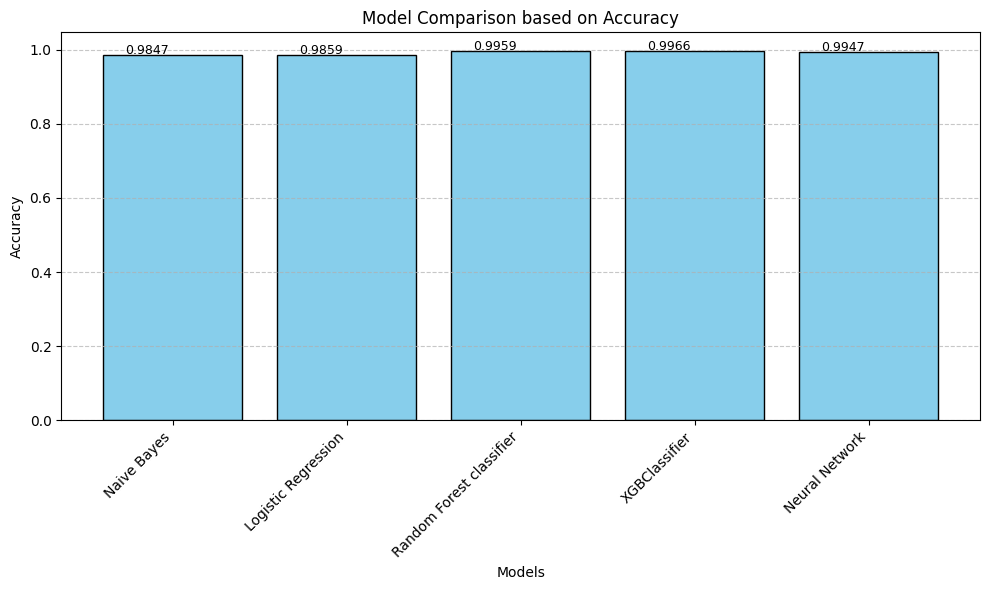

In [136]:
# Model Comparison based on Accuracy
import matplotlib.pyplot as plt

models = list(accuracy_models.keys())
accuracies = list(accuracy_models.values())

# Creating a bar plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = plt.bar(models, accuracies, color='skyblue', edgecolor='black')

# Adding data values on top of the bars with smaller text size
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.002, f'{accuracy:.4f}', ha='center', fontsize=9, color='black')

# Adding labels and title with smaller text size
plt.xlabel('Models', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Model Comparison based on Accuracy', fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


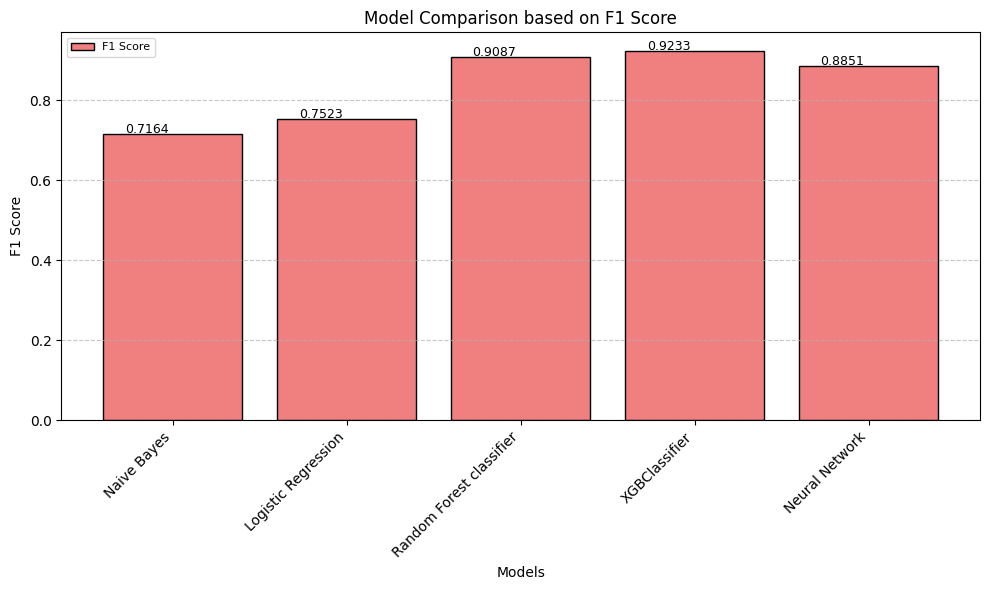

In [134]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming F1_scores_models is your dictionary
F1_scores_models = {'Naive Bayes': 0.7163601161665053,
                    'Logistic Regression': 0.7522935779816514,
                    'Random Forest classifier': 0.9086705202312138,
                    'XGBClassifier': 0.923258559622196,
                    'Neural Network': 0.8851}

# Extracting model names and F1 scores
models = list(F1_scores_models.keys())
F1_scores = list(F1_scores_models.values())

# Creating a bar plot with a different color
fig, ax = plt.subplots(figsize=(10, 6))
bars = plt.bar(models, F1_scores, color='lightcoral', edgecolor='black')

# Adding data values on top of the bars with smaller text size
for bar, f1_score in zip(bars, F1_scores):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.002, f'{f1_score:.4f}', ha='center', fontsize=9, color='black')

# Adding labels and title with smaller text size
plt.xlabel('Models', fontsize=10)
plt.ylabel('F1 Score', fontsize=10)
plt.title('Model Comparison based on F1 Score', fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Modifying legend with smaller text size
plt.legend(['F1 Score'], loc='upper left', fontsize=8)

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


In [135]:
# Selecting the XG Boost model and predicting the outcomes on the Test Data

In [84]:
y_proba_xgb_val = xgb_classifier.predict_proba(df_val_imputed)[:, 1]

# Convert probabilities to binary predictions (0 or 1) using a threshold
threshold = 0.5  # You can adjust the threshold as needed
y_pred_xgb_val = (y_proba_xgb_val > threshold).astype(int)

# Create a DataFrame with 'probability' and 'target values'
df_result_xgb_val = pd.DataFrame({'Probability': y_proba_xgb_val, 'Target': y_pred_xgb_val})

In [90]:
df_result_xgb_val['target values'].value_counts()

0    48900
1     1100
Name: target values, dtype: int64

In [91]:
# Final Prediction on the test data
df_result_xgb_val

,primary key,target values,probability
0,9000001,0,0.000042
1,9000002,0,0.000035
2,9000003,0,0.000002
3,9000004,0,0.000004
4,9000005,0,0.000034
...,...,...,...
49995,9049996,1,0.968219
49996,9049997,1,0.996807
49997,9049998,1,0.965110
49998,9049999,1,0.988955
